In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [86]:
df = pd.read_csv('heart.csv')

In [87]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [89]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Axes: xlabel='Cholesterol', ylabel='Count'>

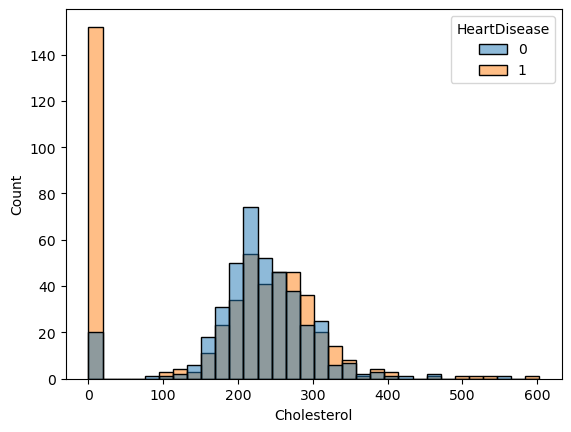

In [90]:
sns.histplot(data=df,x='Cholesterol', hue='HeartDisease')

<Axes: xlabel='Age', ylabel='Count'>

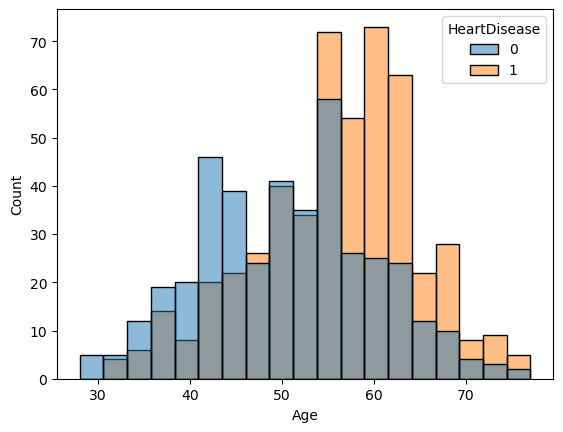

In [91]:
sns.histplot(data=df,x='Age', hue='HeartDisease')

<Axes: xlabel='ChestPainType', ylabel='Count'>

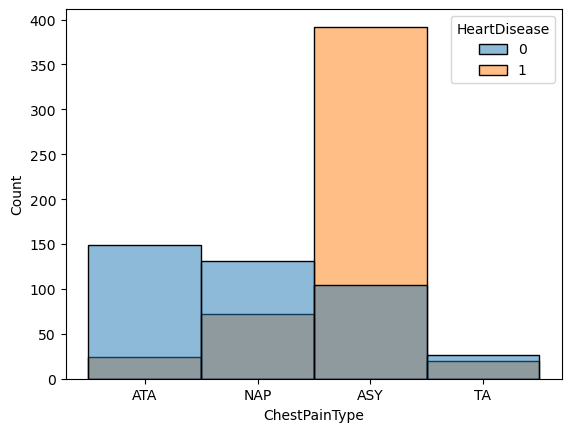

In [92]:
sns.histplot(data=df,x='ChestPainType', hue='HeartDisease')

In [93]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = df.select_dtypes(include=['object']).columns
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(df[categorical_features])
df[ohe.get_feature_names_out()] = ohe.transform(df[categorical_features])
df = df.drop(categorical_features, axis=1)

/Users/vadim/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [94]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193,1,141,3.4,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131,0,115,1.2,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,130,236,0,174,0.0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('HeartDisease', axis=1),
    df.HeartDisease,
    test_size=0.2,
    random_state=1589)
models = {}

In [96]:
from sklearn.metrics import accuracy_score, recall_score

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree = DecisionTreeClassifier(random_state=1589).fit(X_train, y_train)
rf = RandomForestClassifier(random_state=1589).fit(X_train, y_train)
models['tree']  = tree
models['rf']   = rf

In [98]:
from sklearn.metrics import classification_report

def print_report(name, model, X_test, y_test):
    print(f'{name}\n', '_'*10)
    print(model.predict(X_test))
    print(classification_report(y_test, model.predict(X_test)))

In [99]:
print_report('tree', tree, X_test, y_test)

tree
 __________
[1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0
 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0
 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0]
              precision    recall  f1-score   support

           0       0.75      0.74      0.74        69
           1       0.84      0.85      0.85       115

    accuracy                           0.81       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.81      0.81      0.81       184



In [100]:
print_report('rf', rf, X_test, y_test)

rf
 __________
[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        69
           1       0.85      0.96      0.90       115

    accuracy                           0.86       184
   macro avg       0.88      0.83      0.85       184
weighted avg       0.87      0.86      0.86       184



In [101]:
f_imp = pd.DataFrame({
    'feature': X_train.columns,
    'weight': rf.feature_importances_
})

<Axes: xlabel='weight', ylabel='feature'>

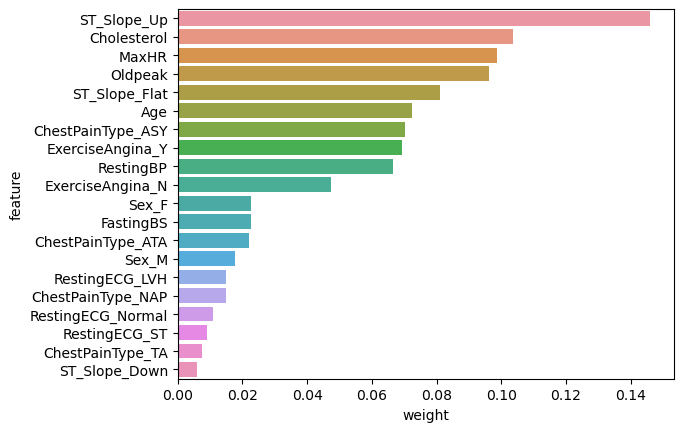

In [102]:
sns.barplot(
    y='feature',
    x='weight',
    data=f_imp,
    orient='h',
    order=f_imp.sort_values(by='weight', ascending=False)['feature']
)

In [103]:
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier(random_state=1589).fit(X_train, y_train)
models['bg']   = bg
print_report('bg', bg, X_test, y_test)

bg
 __________
[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0
 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79        69
           1       0.87      0.88      0.87       115

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



In [104]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

st =  StackingClassifier(
    [
        ('tree', DecisionTreeClassifier(random_state=1589)),
        ('rf', RandomForestClassifier(random_state=1589)),
        ('svm', LinearSVC(random_state=1589)),
    ],
    LogisticRegression(random_state=1589)
)

In [105]:
st.fit(X_train, y_train)
models['st']    = st
print_report('st', st, X_test, y_test)

/Users/vadim/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/vadim/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


st
 __________
[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82        69
           1       0.86      0.96      0.91       115

    accuracy                           0.88       184
   macro avg       0.89      0.85      0.86       184
weighted avg       0.88      0.88      0.87       184



/Users/vadim/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/vadim/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/vadim/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/vadim/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/vadim/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to 

In [106]:
for name, model in st.named_estimators_.items():
    print(f'{name}: метрика {model.score(X_test, y_test):.4f}')

tree: метрика 0.8098
rf: метрика 0.8641
svm: метрика 0.8804


# Итоги

In [107]:
for name, model in models.items():
   print(
      f'{name:5s}: accuracy={accuracy_score(y_test, model.predict(X_test)):.4f}; '
      f'recall={recall_score(y_test, model.predict(X_test)):.4f}'
   ) 

tree : accuracy=0.8098; recall=0.8522
rf   : accuracy=0.8641; recall=0.9565
bg   : accuracy=0.8424; recall=0.8783
st   : accuracy=0.8750; recall=0.9565


Если опираться на Accuracy, то модели выстроились следующим образом
1. Стекинг
2. Случайный лес
3. Беггинг
4. Дерево

Но так как мы имеем дело с медицинской моделью, на мой взгляд логичней опираться на Recall.

Тут впереди Стекинг и Случайный лес.

По совокупности победу одерживает Стекинг

P.S. Я осознано не пытался улучшить модели параметрами. Было интересно, как они поведут себя по умолчанию
